In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = 'BigEarthNet'
# dataset = 'EuroSAT'
# dataset = 'So2Sat'
# dataset = 'OSCD'
models = []
names = []
models += ['vit_base_patch16_224']
models += ['cvit_base_patch16_224']
names += ['mae_vit_v2']
names += ['mae_cvit_v2']
# names += ['mae_base']
# names += ['mae_vit_btnk']
metric = 'mAP' if dataset == 'BigEarthNet' else 'image_acc'
if dataset == 'OSCD':
    # metric = 'precision'
    metric = 'f1'
    # metric = 'recall'

In [3]:
df_all = pd.DataFrame()
for model, name in zip(models, names):
    try:
        path = f'./results/logs/{dataset}_{model}_{name}/ft_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # df.sort_values(by=[metric], inplace=True)
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all

""


In [4]:
sns.lineplot(data=df_all.loc[df_all.weight_decay==1e-3], x='lr', y=metric, hue='model')
# set x axis log scale
plt.xscale('log')

AttributeError: 'DataFrame' object has no attribute 'weight_decay'

In [8]:
df_all = pd.DataFrame()
for model, name in zip(models, names):
    try:
        path = f'./results/logs/{dataset}_{model}_{name}/lp_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # df.sort_values(by=[metric], inplace=True)
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all

,epochs,lr,weight_decay,multi_label_loss,loss,mAP,epoch,num_samples,MultiLabelLoss,model
0,100,0.05,0,NaN,0.206878,0.777179,100,125866,0.206878,mae_vit_v2
1,100,0.10,0,0.205352,0.205352,0.780200,100,125866,NaN,mae_vit_v2
2,100,0.05,0,NaN,0.203659,0.784126,100,125866,0.203659,mae_cvit_v2
3,100,0.10,0,NaN,0.202566,0.786261,100,125866,0.202566,mae_cvit_v2


<Axes: xlabel='lr', ylabel='mAP'>

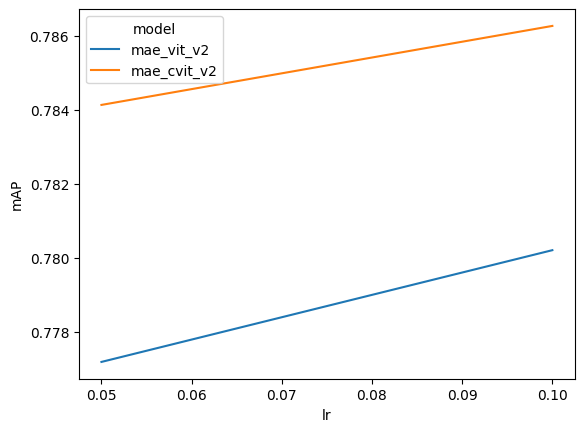

In [9]:
sns.lineplot(data=df_all.loc[df_all.epochs==100], x='lr', y=metric, hue='model')